In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 
data=pd.read_csv("delivery_time.csv")
data.columns


Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [10]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


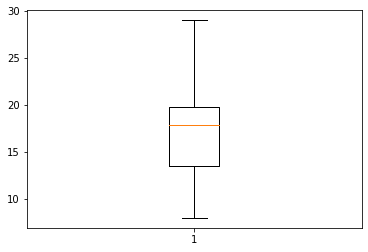

In [11]:
plt.boxplot(data.DeliveryTime)
data.describe() 

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

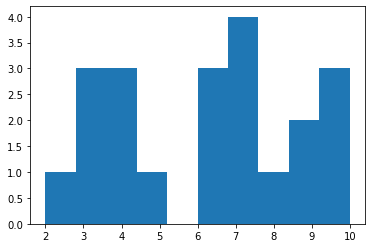

In [12]:
plt.hist(data.SortingTime) 
 

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

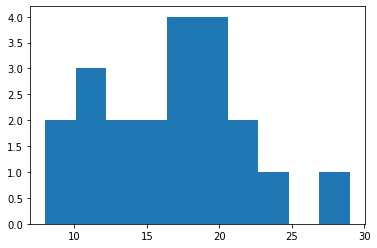

In [13]:
plt.hist(data.DeliveryTime) 

{'whiskers': [<matplotlib.lines.Line2D at 0x27ef0ee55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ef0ee56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ef0ee5b20>],
 'medians': [<matplotlib.lines.Line2D at 0x27ef1064460>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ef1064880>],
 'means': []}

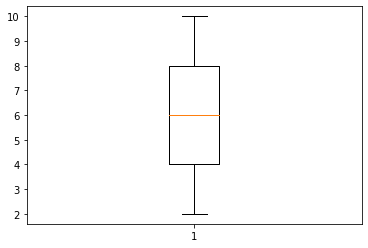

In [14]:
plt.boxplot(data.SortingTime) 

{'whiskers': [<matplotlib.lines.Line2D at 0x27ef15e4dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ef15ee4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ef15e4a60>],
 'medians': [<matplotlib.lines.Line2D at 0x27ef15eeb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ef15eee80>],
 'means': []}

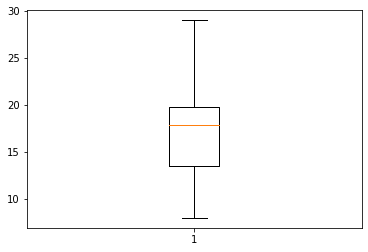

In [15]:
plt.boxplot(data.DeliveryTime) 

Text(0, 0.5, 'deliverytime')

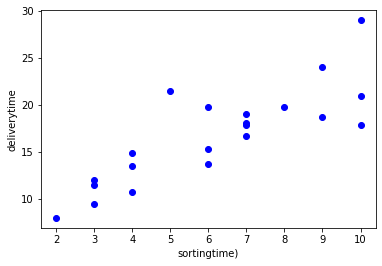

In [16]:
plt.plot(data.SortingTime,data.DeliveryTime,"bo")
plt.xlabel("sortingtime)")
plt.ylabel("deliverytime")
 

In [17]:
data.DeliveryTime.corr(data.SortingTime) 

0.8259972607955327

In [18]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()
model.params  

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        21:04:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#predicted value
pred = model.predict(data.iloc[:,1])
pred  

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [22]:
#error(av-pv)
model.resid 
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [23]:
print(model.conf_int(0.05))

                    0          1
Intercept    2.979134  10.186334
SortingTime  1.108673   2.189367


In [25]:
pred = model.predict(data.iloc[:,1])
pred
pd.set_option("display.max_rows", None) 
pred
rmse_lin = np.sqrt(np.mean((np.array(data['DeliveryTime'])-np.array(pred))**2))
rmse_lin 


2.7916503270617654

Text(0, 0.5, 'DeliveryTime')

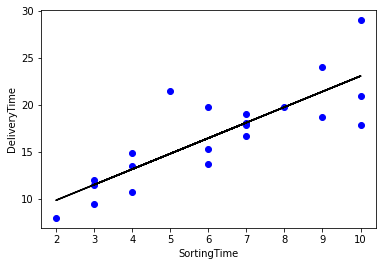

In [26]:
import matplotlib.pylab as plt
plt.scatter(x=data['SortingTime'],y=data['DeliveryTime'],color='blue')
plt.plot(data['SortingTime'],pred,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [27]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=data).fit()
model2.params
model2.resid 
model2.resid_pearson 
 

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        21:05:22   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
pred2 = model2.predict(pd.DataFrame( data['SortingTime'])) 

In [30]:
pred2
rmse_log = np.sqrt(np.mean((np.array(data['DeliveryTime'])-np.array(pred2))**2))
rmse_log 

2.7331714766820663

In [31]:
pred2.corr(data.DeliveryTime)

0.8339325279256244

Text(0, 0.5, 'DeliveryTime')

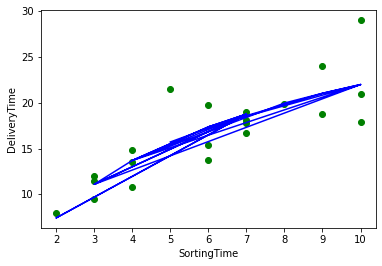

In [32]:
plt.scatter(x= data['SortingTime'],y=data['DeliveryTime'],color='green')
plt.plot(data['SortingTime'],pred2,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [33]:
model3 = smf.ols('np.log(DeliveryTime)~data',data=data).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.967
Model:                              OLS   Adj. R-squared:                  0.963
Method:                   Least Squares   F-statistic:                     261.0
Date:                  Tue, 19 Jan 2021   Prob (F-statistic):           5.09e-14
Time:                          21:06:43   Log-Likelihood:                 30.471
No. Observations:                    21   AIC:                            -54.94
Df Residuals:                        18   BIC:                            -51.81
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7511      0.048     36.640      0.000       1.651       1.851
data[0]        0.0563      0.005     11.750      0.000       0.046       0.066
data[1]        0.0128      0.010      1.338      0.198      -0.007       0.033
==============================================================================
Omnibus:                       12.021   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.863
Skew:                          -1.528   Prob(JB):                      0.00722
Kurtosis:                       4.390   Cond. No.                         67.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred_log = model3.predict(pd.DataFrame(data['SortingTime'])) 

In [35]:
pred_log 

0     3.060278
1     2.561646
2     2.938807
3     3.216250
4     3.510305
5     2.691292
6     2.909406
7     2.323844
8     2.885893
9     2.920920
10    2.968885
11    2.406949
12    2.778898
13    2.436351
14    2.466165
15    2.639276
16    2.601287
17    2.859340
18    2.226675
19    2.843589
20    3.024462
dtype: float64

In [36]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3 

0     21.333495
1     12.957128
2     18.893293
3     24.934436
4     33.458483
5     14.750724
6     18.345891
7     10.214864
8     17.919561
9     18.558346
10    19.470190
11    11.100046
12    16.101264
13    11.431248
14    11.777194
15    14.003058
16    13.481074
17    17.450008
18     9.268997
19    17.177307
20    20.582922
dtype: float64

In [37]:
rmse_exp = np.sqrt(np.mean((np.array(data['DeliveryTime'])-np.array(pred3))**2))
rmse_exp  

1.1554456979951526

In [38]:
pred3.corr(data.DeliveryTime)

0.9797232095478813

AttributeError: 'DataFrame' object has no attribute 'YearsExperience'

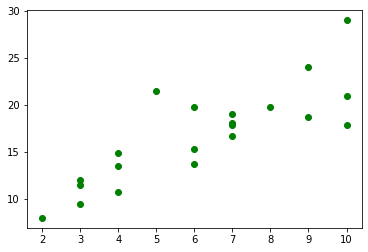

In [39]:
plt.scatter(x=data['SortingTime'],y=data['DeliveryTime'],color='green')
plt.plot(data.YearsExperience,pred3,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')


In [40]:
student_resid = model3.resid_pearson 
student_resid 

array([-0.25726137,  0.67015658,  0.72408587, -0.62366072, -2.33504686,
        0.65023189,  0.57202162, -1.18462444, -0.01783323,  0.16775534,
        0.29898623, -0.52320403,  0.57658109,  0.09790838,  0.34678178,
        0.99179503,  0.32251025,  0.60615993, -2.4040179 ,  0.60892106,
        0.7117535 ])

Text(0, 0.5, 'Standardized Residual')

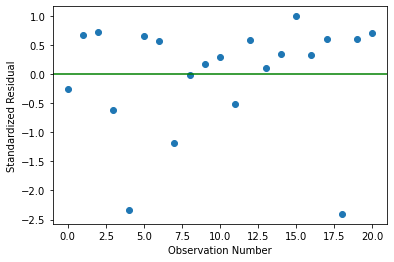

In [41]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

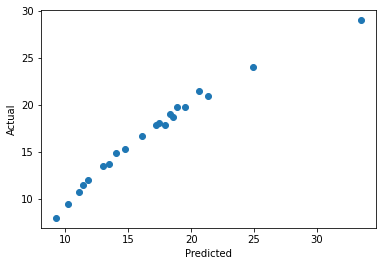

In [42]:
plt.scatter(x=pred3,y=data.DeliveryTime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [43]:
data["exp_Sq"] = data.SortingTime*data.SortingTime
data

,DeliveryTime,SortingTime,exp_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81
